In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)

In [4]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

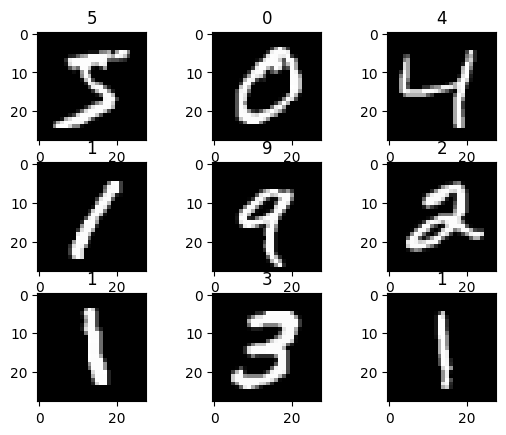

In [8]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    #print corresponding label
    plt.title(y_train[i])
plt.show()

In [9]:
# a more complex convolutional neural network for hand written digit recognition
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 42s 21ms/step - loss: 0.1229 - accuracy: 0.9624
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0407 - accuracy: 0.9872
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0275 - accuracy: 0.9911
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0183 - accuracy: 0.9941
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0156 - accuracy: 0.9947


In [12]:
model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0493 - accuracy: 0.9848


[0.049283817410469055, 0.9847999811172485]

In [13]:
model.save('mnist_model.h5')

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
model = tf.keras.models.load_model('mnist_model.h5')

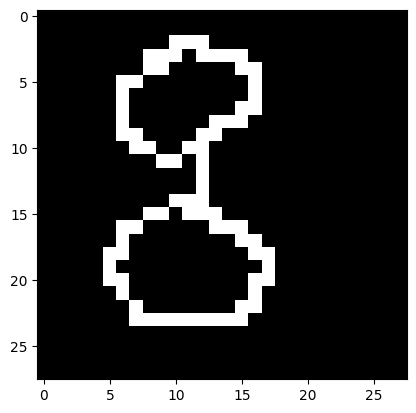

In [79]:
# load image
img = Image.open('2.png')
img = img.resize((28, 28))
# convert to grayscale and the background to black and the number to white
img = img.convert('L')
img = np.invert(img)
img = np.array(img)
img = img/255.0
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


In [80]:
model.predict(img.reshape(-1, 28, 28, 1))
print(np.argmax(model.predict(img.reshape(-1, 28, 28, 1))))

1/1 [==============================] - 0s 42ms/step
8
